<a href="https://colab.research.google.com/github/narmadhaprasanth/CNN/blob/master/largeCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


#Dataset, Transforms and Visualization

In [0]:
transform_train = transforms.Compose([
                  transforms.RandomResizedCrop(224),
                  transforms.ToTensor(),
                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                ])
transform_test = transforms.Compose([
                  transforms.RandomResizedCrop(224),
                  transforms.ToTensor(),
                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                ])

In [0]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                       download=True,
                                       transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,
                                       download=True,
                                       transform=transform_test)

0it [00:00, ?it/s]

100%|█████████▉| 170172416/170498071 [00:41<00:00, 4524749.52it/s]

Files already downloaded and verified


In [0]:
num_classes=10

In [0]:
batch_size=4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
1


In [0]:
def imshow(img, title):
  npimg = img.numpy()/2 + 0.5
  plt.figure(figsize=(batch_size,1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.title(title)
  plt.show()

In [0]:
def show_batch_images(dataloader):
  images, labels = next(iter(dataloader))
  img = torchvision.utils.make_grid(images)
  imshow(img, title=[str(x.item()) for x in labels])

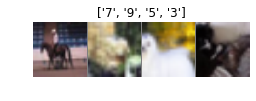

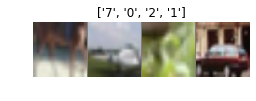

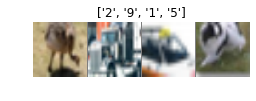

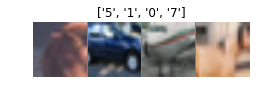

In [0]:
for i in range(4):
  show_batch_images(trainloader)

#Create VGG16

In [0]:
from torchvision import models

In [0]:
vgg = models.vgg16_bn() # bn- batch normalization

In [0]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [0]:
print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [0]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [0]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1] #mod_calssifier wil have all the children of vgg_classifier except the last one
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=10, bias=True)]


In [0]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

#Train CIFAR10

In [0]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [0]:
def evaluation(dataloader, model):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1)
    total +=labels.size(0)
    correct += (pred == labels).sum().item()
    return 100*correct/total

In [0]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

In [0]:
loss_epoch_arr = []
max_epochs = 1
n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader, 0):
    
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    
    opt.zero_grad()
    
    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    
    del inputs, outputs, labels
    torch.cuda.empty_cache()
    
    if i%100 == 0:
      print('Iteration: %d/%d, loss=%0.2f' %(i, n_iters, loss.item()))
    
  loss_epoch_arr.append(loss.item())
    
  print('Epoch: %d/%dTest_accu:%0.2f Train_accu:%0.2f' %(epoch, max_epochs, 
                                                        evaluation(testloader, vgg),
                                                        evaluation(trainloader, vgg)))

plt.plot(loss_epoch_arr)
plt.show()
    

Iteration: 0/3125, loss=11.84
Iteration: 100/3125, loss=6.25
Iteration: 200/3125, loss=2.37
Iteration: 300/3125, loss=2.24
Iteration: 400/3125, loss=2.31
Iteration: 500/3125, loss=2.17
Iteration: 600/3125, loss=2.30
Iteration: 700/3125, loss=2.24
Iteration: 800/3125, loss=2.34
Iteration: 900/3125, loss=3.35
Iteration: 1000/3125, loss=2.31
Iteration: 1100/3125, loss=2.30
Iteration: 1200/3125, loss=2.30
Iteration: 1300/3125, loss=2.31
Iteration: 1400/3125, loss=2.30
Iteration: 1500/3125, loss=2.31
Iteration: 1600/3125, loss=2.29
Iteration: 1700/3125, loss=2.34
Iteration: 1800/3125, loss=2.31
Iteration: 1900/3125, loss=2.28
Iteration: 2000/3125, loss=2.28
Iteration: 2100/3125, loss=2.30
Iteration: 2200/3125, loss=2.29
Iteration: 2300/3125, loss=2.31
Iteration: 2400/3125, loss=2.30
Iteration: 2500/3125, loss=2.32
Iteration: 2600/3125, loss=2.40
Iteration: 2700/3125, loss=2.31
Iteration: 2800/3125, loss=2.37
Iteration: 2900/3125, loss=2.33
Iteration: 3000/3125, loss=2.31
Iteration: 3100/312

NameError: ignored

#Freeze layers of convulution models


In [0]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [0]:
vgg = models.vgg16_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth

 18%|█▊        | 98459648/553507836 [00:03<00:16, 27728190.99it/s]
170500096it [01:00, 4524749.52it/s]                               
100%|██████████| 553507836/553507836 [00:20<00:00, 27015878.87it/s]

In [0]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1] #mod_calssifier wil have all the children of vgg_classifier except the last one
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=10, bias=True)]


In [0]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [0]:
for param in vgg.parameters():
  param.requires_grad = False

In [0]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [0]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

In [0]:
loss_epoch_arr = []
max_epochs = 1
n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader, 0):
    
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    
    opt.zero_grad()
    
    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    
    del inputs, outputs, labels
    torch.cuda.empty_cache()
    
    if i%100 == 0:
      print('Iteration: %d/%d, loss=%0.2f' %(i, n_iters, loss.item()))
    
  loss_epoch_arr.append(loss.item())
    
  print('Epoch: %d/%dTest_accu:%0.2f Train_accu:%0.2f' %(epoch, max_epochs, 
                                                        evaluation(testloader, vgg),
                                                        evaluation(trainloader, vgg)))

plt.plot(loss_epoch_arr)
plt.show()
    

#With model copies

In [0]:
import copy

In [0]:
loss_epoch_arr = []
max_epochs = 1
min_loss = 1000
n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader, 0):
    
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    
    opt.zero_grad()
    
    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    
    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(vgg.state_dict())
      print('Min loss = %0.2f' % min_loss)
    
    del inputs, outputs, labels
    torch.cuda.empty_cache()
    
    if i%100 == 0:
      print('Iteration: %d/%d, loss=%0.2f' %(i, n_iters, loss.item()))
    
  loss_epoch_arr.append(loss.item())
    
  print('Epoch: %d/%dTest_accu:%0.2f Train_accu:%0.2f' %(epoch, max_epochs, 
                                                        evaluation(testloader, vgg),
                                                        evaluation(trainloader, vgg)))

plt.plot(loss_epoch_arr)
plt.show()
    

Min loss = 2.62
Iteration: 0/3125, loss=2.62
Min loss = 2.26
Min loss = 2.13
Min loss = 1.99
Min loss = 1.88
Min loss = 1.87
Min loss = 1.58
Min loss = 1.40
Min loss = 1.32
Min loss = 1.16
Iteration: 100/3125, loss=1.22
Min loss = 1.06
Iteration: 200/3125, loss=1.47
Iteration: 300/3125, loss=1.56
Min loss = 0.93
Min loss = 0.92
Iteration: 400/3125, loss=1.66
Min loss = 0.82
Iteration: 500/3125, loss=2.27
Iteration: 600/3125, loss=2.31
Iteration: 700/3125, loss=1.44
Min loss = 0.75
Min loss = 0.61
Iteration: 800/3125, loss=2.82
Iteration: 900/3125, loss=1.96
Iteration: 1000/3125, loss=2.80
Iteration: 1100/3125, loss=0.69
Iteration: 1200/3125, loss=2.51
Iteration: 1300/3125, loss=2.49
Iteration: 1400/3125, loss=3.59
Iteration: 1500/3125, loss=2.94
Min loss = 0.55
Iteration: 1600/3125, loss=2.44
Iteration: 1700/3125, loss=2.07
Iteration: 1800/3125, loss=1.63
Iteration: 1900/3125, loss=2.19
Iteration: 2000/3125, loss=0.98
Iteration: 2100/3125, loss=2.31
Iteration: 2200/3125, loss=2.23
Min 

NameError: ignored

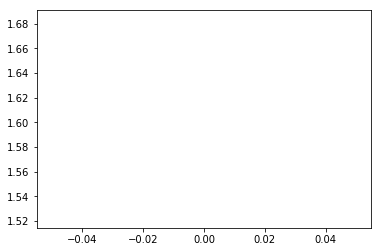

In [0]:

plt.plot(loss_epoch_arr)
plt.show()

In [0]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader,vgg), evaluation(testloader,vgg))

#Resnet model

In [0]:
resnet = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth

100%|██████████| 46827520/46827520 [00:01<00:00, 26251596.64it/s]

In [0]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
for param in resnet.parameters():
  param.requires_grad = False

In [0]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [0]:
for param in resnet.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [0]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(resnet.parameters(), lr=0.01)


min_loss: 2.42
Iteration:0/3125, loss:2.42
min_loss: 2.36
min_loss: 2.22
min_loss: 2.21
min_loss: 2.07
min_loss: 1.98
min_loss: 1.98
min_loss: 1.78
min_loss: 1.76
min_loss: 1.76
min_loss: 1.72
min_loss: 1.71
min_loss: 1.70
min_loss: 1.52
Iteration:100/3125, loss:1.81
min_loss: 1.46
min_loss: 1.41
min_loss: 1.35
min_loss: 1.33
Iteration:200/3125, loss:1.70
min_loss: 1.21
min_loss: 1.20
min_loss: 1.18
min_loss: 1.18
Iteration:300/3125, loss:1.45
min_loss: 1.14
min_loss: 1.08
min_loss: 1.01
Iteration:400/3125, loss:1.75
min_loss: 1.00
Iteration:500/3125, loss:1.39
min_loss: 0.91
Iteration:600/3125, loss:1.38
min_loss: 0.73
Iteration:700/3125, loss:1.05
min_loss: 0.64
Iteration:800/3125, loss:1.00
Iteration:900/3125, loss:1.54
Iteration:1000/3125, loss:1.55
Iteration:1100/3125, loss:0.94
Iteration:1200/3125, loss:1.39
Iteration:1300/3125, loss:1.19
Iteration:1400/3125, loss:1.07
Iteration:1500/3125, loss:1.29
Iteration:1600/3125, loss:1.16
Iteration:1700/3125, loss:1.06
Iteration:1800/3125

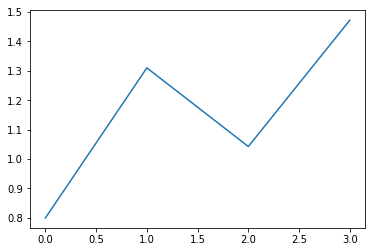

In [0]:
loss_epoch_err = []
max_epochs = 4

min_loss =1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  
  for i, data in enumerate(trainloader, 0):
    
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    
    opt.zero_grad()
    
    outputs = resnet(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    
    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(resnet.state_dict())
      print('min_loss: %0.2f' % min_loss)
      
    if i % 100 == 0:
      print('Iteration:%d/%d, loss:%0.2f' %(i, n_iters, loss.item()))
      
    del inputs, outputs, labels
    torch.cuda.empty_cache()
    
  loss_epoch_err.append(loss.item())
  
  print('Epoch:%d/%d, train_acc:%0.2f, test_acc:%0.2f' %(epoch, 
                                                        max_epochs, 
                                                        evaluation(trainloader, resnet),
                                                        evaluation(testloader, resnet)))

plt.plot(loss_epoch_err)
plt.show()

In [0]:
resnet.load_state_dict(best_model)
print(evaluation(trainloader,resnet), evaluation(testloader,resnet))

68.75 62.5


#Inception Model

In [0]:
inception = models.inception_v3(pretrained=True)

In [0]:
print(inception)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
for param in inception.parameters():
  param.requires_grad = False

In [0]:
aux_in_features = inception.AuxLogits.fc.in_features
inception.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)

In [0]:
for params in inception.parameters():
  if params.requires_grad:
    print(params.shape)

torch.Size([10, 768])
torch.Size([10])


In [0]:
in_features = inception.fc.in_features
inception.fc = nn.Linear(in_features, num_classes)

In [0]:
for params in inception.parameters():
  if params.requires_grad:
    print(params.shape)

torch.Size([10, 768])
torch.Size([10])
torch.Size([10, 2048])
torch.Size([10])


In [0]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(299), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(299), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [0]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, 
                                        transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
batch_size=16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


In [0]:
inception = inception.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(inception.parameters(), lr=0.01)

In [0]:
def evaluation_inception(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs, aux_outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
loss_epoch_err = []
max_epochs = 1

min_loss =1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  
  for i, data in enumerate(trainloader, 0):
    
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    
    opt.zero_grad()
    
    outputs, aux_outputs = inception(inputs)
    loss = loss_fn(outputs, labels) + 0.3 * loss_fn(aux_outputs, labels)
    loss.backward()
    opt.step()
    
    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(inception.state_dict())
      print('min_loss: %0.2f' % min_loss)
      
    if i % 100 == 0:
      print('Iteration:%d/%d, loss:%0.2f' %(i, n_iters, loss.item()))
      
    del inputs, outputs, labels
    torch.cuda.empty_cache()
    
  loss_epoch_err.append(loss.item())
  
  print('Epoch:%d/%d, train_acc:%0.2f, test_acc:%0.2f' %(epoch, 
                                                        max_epochs, 
                                                        evaluation(trainloader, inception),
                                                        evaluation(testloader, inception)))

plt.plot(loss_epoch_err)
plt.show()

min_loss: 3.05
Iteration:0/3125, loss:3.05
min_loss: 3.02
min_loss: 2.99
min_loss: 2.95
min_loss: 2.88
min_loss: 2.79
min_loss: 2.77
min_loss: 2.75
min_loss: 2.59
min_loss: 2.58
Iteration:100/3125, loss:2.69
min_loss: 2.37
min_loss: 2.29
min_loss: 2.25
Iteration:200/3125, loss:2.64
min_loss: 2.03
Iteration:300/3125, loss:2.09
min_loss: 2.01
min_loss: 1.98
min_loss: 1.97
min_loss: 1.86
Iteration:400/3125, loss:2.26
Iteration:500/3125, loss:2.14
min_loss: 1.84
min_loss: 1.71
Iteration:600/3125, loss:2.11
min_loss: 1.69
Iteration:700/3125, loss:2.37
min_loss: 1.65
Iteration:800/3125, loss:1.94
min_loss: 1.58
min_loss: 1.56
min_loss: 1.50
Iteration:900/3125, loss:2.40
Iteration:1000/3125, loss:2.41
min_loss: 1.45
min_loss: 1.37
Iteration:1100/3125, loss:1.89
Iteration:1200/3125, loss:2.16
min_loss: 1.32
min_loss: 1.29
Iteration:1300/3125, loss:2.18
Iteration:1400/3125, loss:1.57
min_loss: 1.19
Iteration:1500/3125, loss:1.71
Iteration:1600/3125, loss:2.04
Iteration:1700/3125, loss:1.97
Iter

AttributeError: ignored

In [0]:
inception.load_state_dict(best_model)
print(evaluation(trainloader,resnet), evaluation(testloader,resnet))